In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv("train.txt", header=None)

In [3]:
data_frame.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data_frame.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


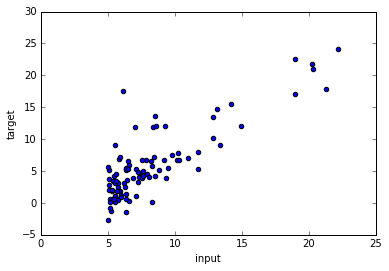

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data_frame[0], data_frame[1])
plt.xlabel("input")
plt.ylabel("target")
plt.show()

In [7]:
import numpy as np

def shuffle(df, n=1, axis=0):
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [19]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(data_frame, test_size=0.1)

def data_reshape(data):
    "sklearn needs data in 2d array"
    dlen = len(data[0])
    x = data[0].reshape(dlen, 1)
    y = data[1].reshape(dlen, 1)
    return x, y

train_x, train_y = data_reshape(train)
test_x, test_y = data_reshape(test)

# full dataset for error calculation
df_x, df_y = data_reshape(df)

print train.describe()
print test.describe()

               0          1
count  87.000000  87.000000
mean    8.115847   5.697196
std     3.973421   5.551745
min     5.026900  -2.680700
25%     5.674200   1.847300
50%     6.515900   4.295900
75%     8.462800   6.935000
max    22.203000  24.147000
               0          1
count  10.000000  10.000000
mean    8.542190   7.074005
std     2.949409   5.240481
min     5.305400   0.617050
25%     6.632350   4.058875
50%     7.997500   5.279350
75%     9.189000  11.775425
max    14.164000  15.505000


In [20]:
from sklearn.linear_model import LinearRegression

train_len = len(train[0])

lm = LinearRegression()
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print('Score: ', lm.score(test_x, test_y))

('Score: ', 0.62250225807997306)


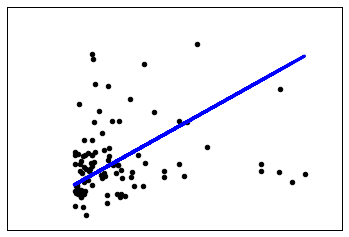

In [22]:
# lest see fit on whole data set
plt.scatter(df[0], df[1],  color='black')
plt.plot(df[0], lm.predict(df[0].reshape(97, 1)), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Year, CO2 emission to predict global temperature

In [23]:
co2_df = pd.read_csv("global_co2.csv")
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [24]:
temp_df = pd.read_csv("annual_temp.csv")
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [25]:
# Clean data, drop other columns keep only Year, CO2
co2_df = co2_df.ix[:,:2]
co2_df = co2_df.ix[co2_df['Year'] >= 1960]
co2_df.columns=['Year','CO2']
co2_df = co2_df.reset_index(drop=True) 
co2_df.head()

,Year,CO2
0,1960,2569
1,1961,2580
2,1962,2686
3,1963,2833
4,1964,2995


In [26]:
temp_df = temp_df[temp_df.Source != 'GISTEMP']
temp_df.drop('Source', inplace=True, axis=1)
temp_df = temp_df.reindex(index=temp_df.index[::-1])
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]
temp_df.columns=['Year','Temperature']
temp_df = temp_df.reset_index(drop=True)

temp_df.head()

,Year,Temperature
0,1960,0.0252
1,1961,0.0818
2,1962,0.0924
3,1963,0.1100
4,1964,-0.1461


In [27]:
# Concatenate df
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


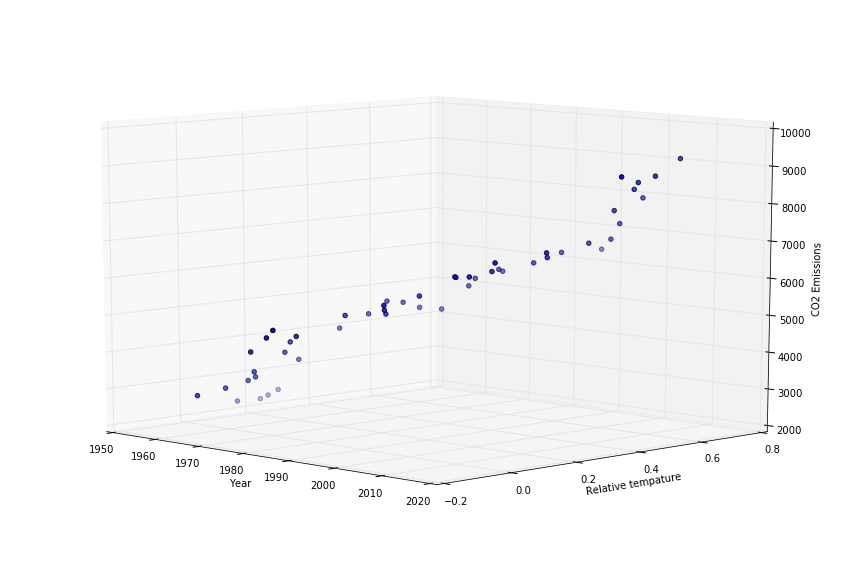

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

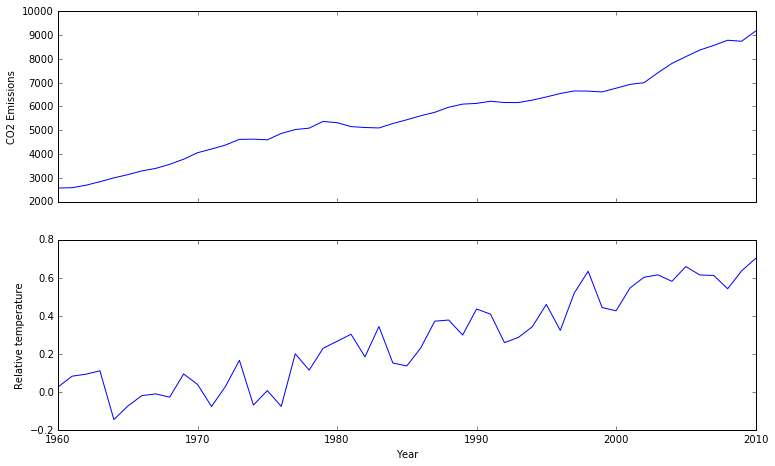

In [30]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [31]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))


In [33]:
X_train

array([[2009],
       [1984],
       [1978],
       [2007],
       [2003],
       [1967],
       [1992],
       [1982],
       [1986],
       [1996],
       [1966],
       [1968],
       [1961],
       [1981],
       [1965],
       [1960],
       [1987],
       [1974],
       [2004],
       [1970],
       [2006],
       [1989],
       [1993],
       [1985],
       [2010],
       [1964],
       [2008],
       [1988],
       [1983],
       [2000],
       [1971],
       [1990],
       [2001],
       [1976],
       [1999],
       [1994],
       [1977],
       [2005],
       [1980],
       [1997],
       [1975],
       [2002],
       [1963],
       [1998],
       [1969]], dtype=int64)

In [34]:
print y_train

[[  8.74000000e+03   6.35399997e-01]
 [  5.28000000e+03   1.50999993e-01]
 [  5.08700000e+03   1.13899998e-01]
 [  8.56600000e+03   6.11299992e-01]
 [  7.41600000e+03   6.14499986e-01]
 [  3.39300000e+03  -1.11999996e-02]
 [  6.16400000e+03   2.58300006e-01]
 [  5.11300000e+03   1.83599994e-01]
 [  5.60700000e+03   2.30800003e-01]
 [  6.54200000e+03   3.22499990e-01]
 [  3.28800000e+03  -2.04000007e-02]
 [  3.56600000e+03  -2.82000005e-02]
 [  2.58000000e+03   8.17999989e-02]
 [  5.15200000e+03   3.02399993e-01]
 [  3.13000000e+03  -7.51999989e-02]
 [  2.56900000e+03   2.52000000e-02]
 [  5.75200000e+03   3.70999992e-01]
 [  4.62300000e+03  -6.97999969e-02]
 [  7.80700000e+03   5.80600023e-01]
 [  4.05300000e+03   3.83000001e-02]
 [  8.37000000e+03   6.13900006e-01]
 [  6.09700000e+03   2.98200011e-01]
 [  6.16200000e+03   2.85699993e-01]
 [  5.43900000e+03   1.35700002e-01]
 [  9.16700000e+03   7.00800002e-01]
 [  2.99500000e+03  -1.46100000e-01]
 [  8.78300000e+03   5.41499972e-01]
 

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

('Score: ', 0.92331209177108187)


In [37]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

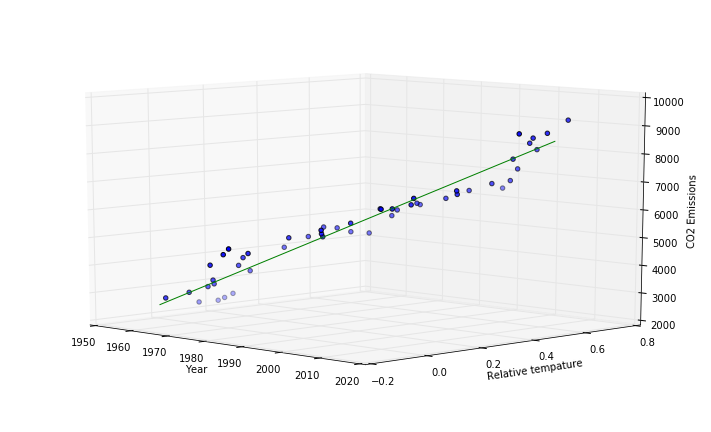

In [38]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

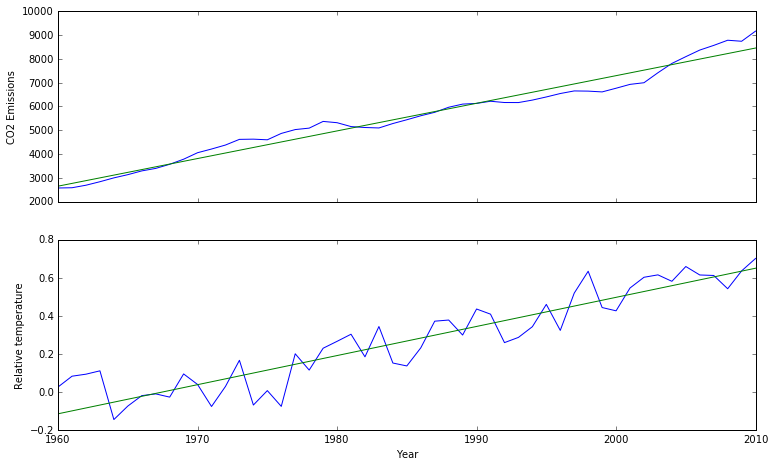

In [39]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')